# Beurteilung von Regressionen

In diesem Kurs betrachten wir zwei Werte bei der Beurteilung von Regressionen: MSE und R2-Score.

## Ausgangslage

Die Ausgangslage ist, wie bei allen Evaluierungen, wie folgt: Wir haben das Modell auf gewissen Trainingsdaten trainiert. Jetzt wenden wir das Modell auf die X-Werte der Testdaten an. Der Fehler pro Punkt ist der Unterschied von geschatzem y-Wert und tatsächlichem, bekannten y-Wert.

Hier folgt ein konkretes Beispiel analog des Beispiels in der Linearen Regression. Hier wird eine quadratische Funktion ohne "Noise", sprich ungenaue Daten, verwendet um die Fehler genauer darzustellen.

Wir verwenden hier Funktionen, um dieselbe Ausgangslage an verschiedenen Punkte in diesem Notebook wieder ausführen zu können.

### Vorbereitung

In [ ]:
# Pyplot importieren
import matplotlib.pyplot as plt

# Seaborn importieren
import seaborn as sns

# sklearn libraries importieren
from sklearn import linear_model, metrics

# Numpy importieren
import numpy as np

# Tuple type annotation
from typing import Tuple, Union

# Mathematikfunktionen wie sqrt
import math

In [ ]:
def f(x: Union[float, np.ndarray], a: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
  return a*x*x - 10

In [ ]:
def get_dataset(scale: float) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
  num_points = 20
  width = 10

  # Trainingspunkte
  #x_train = np.arange(start=0.5, stop=width, step=2)
  x_train = np.arange(start=1, stop=5, step=0.5)
  print("x_train",x_train)

  # Testpunkte in fixem Abstand
  x_test = np.arange(start=0, stop=width+1, step=1)

  # Modellfunktion berechnen
  y_train = f(x_train, scale)
  y_test = f(x_test, scale)

  return (x_train, x_test, y_train, y_test)

In [ ]:
get_dataset(2.5)

x_train [1.  1.5 2.  2.5 3.  3.5 4.  4.5]


(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([-7.5  , -4.375,  0.   ,  5.625, 12.5  , 20.625, 30.   , 40.625]),
 array([-10. ,  -7.5,   0. ,  12.5,  30. ,  52.5,  80. , 112.5, 150. ,
        192.5, 240. ]))

In [ ]:
def plot_result(reg: linear_model.LinearRegression, x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, y_predict: np.ndarray) -> None:
  plt.figure(figsize=(10,10))

  # Modell-Kurve
  plt.plot(x_test, y_test, 'r', linewidth=5, zorder=1)

  # Vorhersagen Testdaten
  plt.scatter(x_test, y_predict, c='k', linewidth=0, zorder=2)

In [ ]:
# Führt den Standardablauf mit gegebener Skalierung aus
def run_regression(scale: float) -> Tuple[np.ndarray, np.ndarray]:
  x_train, x_test, y_train, y_test = get_dataset(scale)

  reg = linear_model.LinearRegression()
  reg.fit(x_train.reshape(-1, 1), y_train)
  y_predict = reg.predict(x_test.reshape(-1, 1))

  plot_result(reg, x_train, x_test, y_train, y_test, y_predict)
  plt.show()
  return (y_test, y_predict)

### Beispiel Fehler

x_train [1.  1.5 2.  2.5 3.  3.5 4.  4.5]


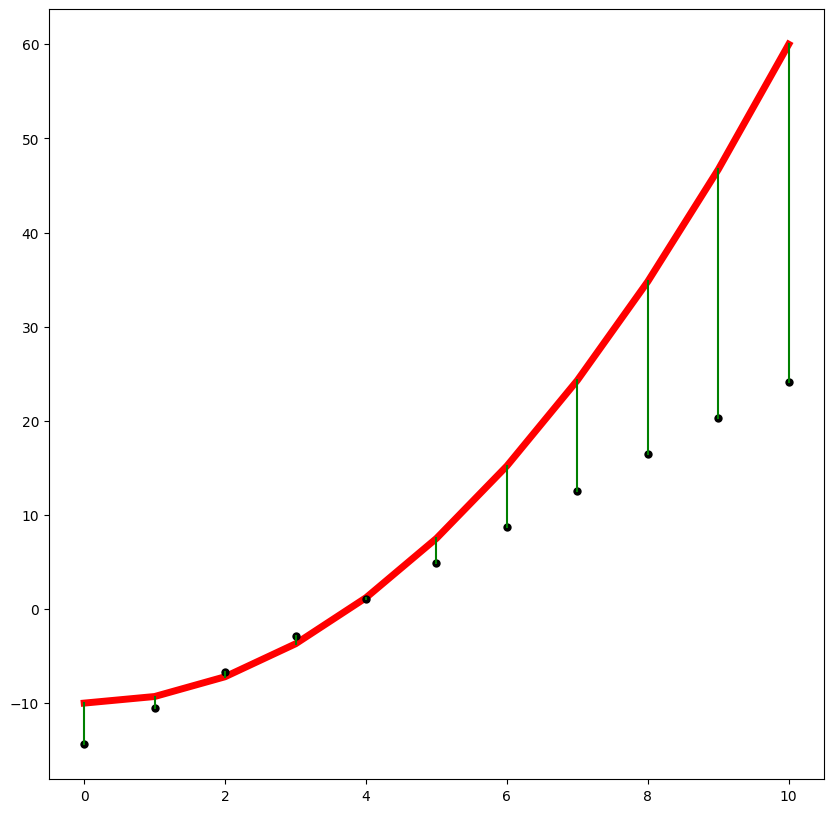

In [ ]:
scale = 0.7
x_train, x_test, y_train, y_test = get_dataset(scale)

reg = linear_model.LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)
y_predict = reg.predict(x_test.reshape(-1, 1))

plot_result(reg, x_train, x_test, y_train, y_test, y_predict)
for i, x in enumerate(x_test):
  # print("x",x)
  # print("y_test",y_test)
  # print("y_pred",y_predict)
  plt.plot([x, x], [y_test[i], y_predict[i]], 'g')
plt.show()

Hier repräsentiert die Länge der grünen Linie den Fehler auf genau diesem Punkt. Jeder schwarze Punkt repräsentiert einen Schätzwert im Testset, die rote Linie repräsentiert das perfekte Modell.

## MSE

Der MSE (Mean Square Error) ist der Durchschnitt des Fehlers pro Punkt im Quadrat. Genauer für n Punkte:

$$ MSE = \frac{(Fehler\ Punkt\ 1)^2 + (Fehler\ Punkt\ 2)^2 + \ldots + (Fehler\ Punkt\ n)^2}{n} $$

Der optimale MSE ist 0, dann ist jeder Punkt genau auf dem Testwert. Das wird in der Realität jedoch nie erreicht. Mit folgendem Trick kann man diesen Wert besser interpretieren: Die Wurzel vom MSE entspricht (für unsere Zwecke) der Standardabweichung. Die Standardabweichung besagt, wie gross der Fehler eines Durchschnittlichen Punktes ist. Hat man einen MSE von 9, so kann man davon ausgehen, dass ein Punkt im Schnitt +-3 entfernt vom optimalen Wert liegt. Die Standardabweichung hat immer dieselbe Einheit wie der Schätzwert.

Ein MSE von 100, Standardabweichung von 10, ist für das Einschätzen von der Verspätung eines Fluges in Minuten also gut. Falls man jedoch die Bewertungen im App Store, 1-5 Sterne, einschätzen möchte, so ist das ein sehr schlechter Wert. Beachtet also nicht nur wie nahe der MSE an 0 ist, sondern auch was ihr für realistisch haltet. Beim Beispiel der Flugverspätung kann man sich vorstellen, dass es viele unvorhersehbare Ereignisse gibt, daher ist es nicht realistisch viel mehr als 10 Minuten Genauigkeit zu erreichen.

### Beispiele mit verschieden grossen Werten

Hier sind zwei Beispiele zur Grösse des MSE. Dazu werden wir dasselbe Modell auf verschieden grossen Werten ausführen. Beachtet die Werte der y-Achse.

x_train [1.  1.5 2.  2.5 3.  3.5 4.  4.5]


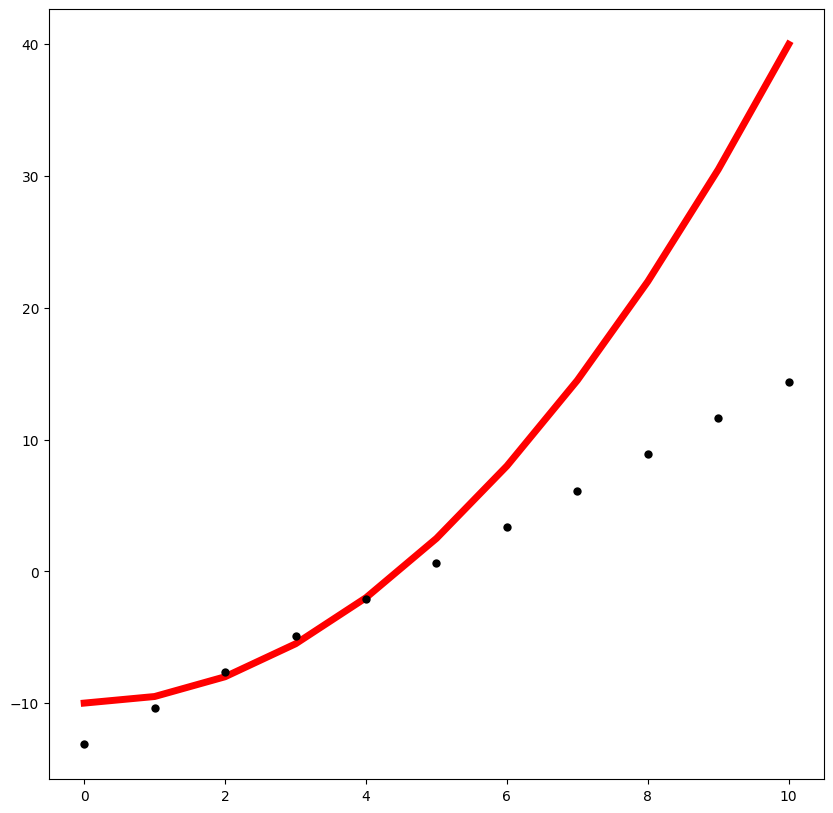

'MSE=117.39062499999987, Standardabweichung=10.83469542719129'

In [ ]:
scale = 0.5
y_test, y_predict = run_regression(scale)

# Berechnung des MSE basiert auf den Testwerten und Schätzwerten
mse = metrics.mean_squared_error(y_test, y_predict)

"MSE={}, Standardabweichung={}".format(mse, math.sqrt(mse))

x_train [1.  1.5 2.  2.5 3.  3.5 4.  4.5]


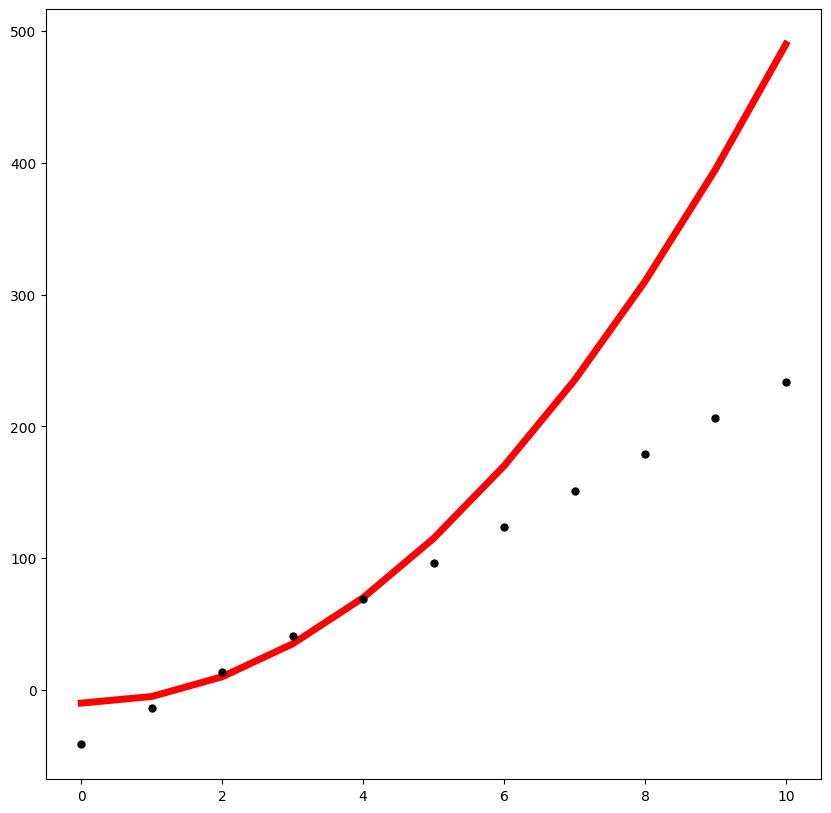

'MSE=11739.062499999993, Standardabweichung=108.34695427191294'

In [ ]:
# Zehnfache Werte
scale = 5
y_test, y_predict = run_regression(scale)

# Berechnung des MSE basiert auf den Testwerten und Schätzwerten
mse = metrics.mean_squared_error(y_test, y_predict)

"MSE={}, Standardabweichung={}".format(mse, math.sqrt(mse))

Wie man hier sieht, ist der MSE des zweiten Beispieles das Hundertfache des ersten Beispieles. Wie man am Plot sieht ist die Schätzung jedoch gleich gut bei beiden Beispielen.

Bemerkung: Um den MSE bei diesem Beispiel zu verbessern, müsste man ein anderes Modell als eine lineare Regression verwenden.

## R2-Score - Korrelation

Der R2-Score repräsentiert den Zusammenhang von Testwert und Schätzwert. Je höher der R2-Score, desto ähnlicher sind Test- und Schätzwert. Die möglichen Werte sind $-\infty$ bis 1, anders als bei der Korrelationsmatrix.

Ein R2-Score von 1 bedeutet, dass der Schätzwert und Testwert identisch sind. Je kleiner der Wert, desto weniger ähnlich sind die Schätz- und Testwerte. Im Gegensatz zum MSE hängt der Wert nicht von der Grösse der Werte ab.

### Beispiele mit verschieden grossen Werten

Dasselbe Beispiel wie für den MSE. Dieses Mal werden wir sehen, dass der R2-Score nicht von der Grösse abhängig ist.

x_train [1.  1.5 2.  2.5 3.  3.5 4.  4.5]


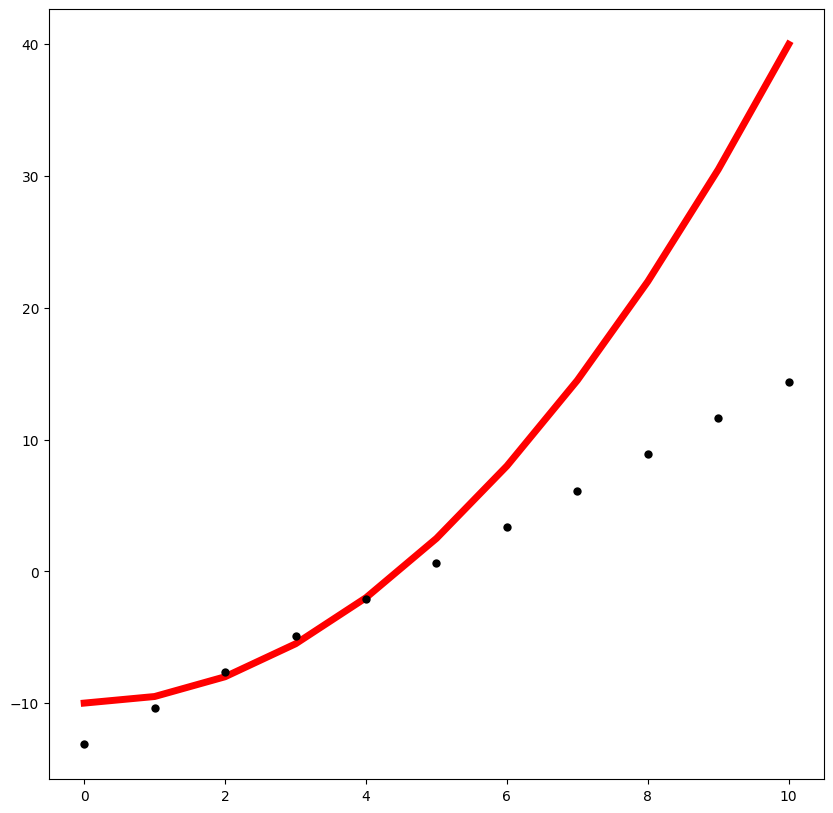

'MSE=117.39062499999987, R2=0.5644132653061229'

In [ ]:
scale = 0.5
y_test, y_predict = run_regression(scale)
mse = metrics.mean_squared_error(y_test, y_predict)
"MSE={}, R2={}".format(mse, metrics.r2_score(y_test, y_predict))

x_train [1.  1.5 2.  2.5 3.  3.5 4.  4.5]


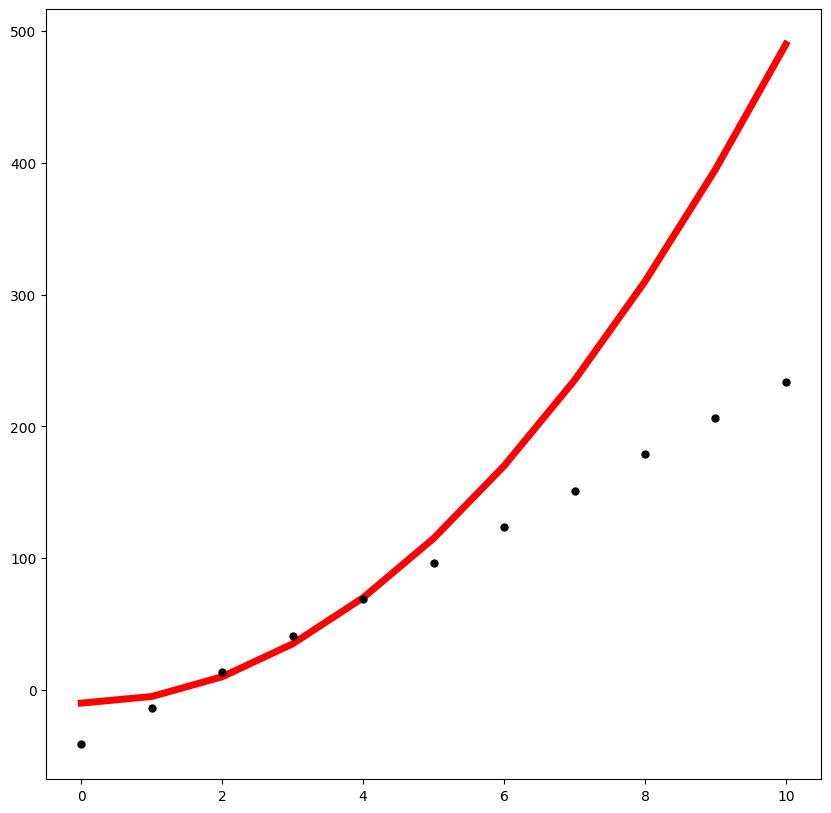

'MSE=11739.062499999993, R2=0.5644132653061227'

In [ ]:
# Zehnfache Werte
scale = 5
y_test, y_predict = run_regression(scale)
mse = metrics.mean_squared_error(y_test, y_predict)
"MSE={}, R2={}".format(mse, metrics.r2_score(y_test, y_predict))

### Simple Beispiele

Hier sind einige simple Beispiele, die mögliche Werte des R2-Scores aufzeigen.

In [ ]:
# Perfekte Schätzung
y_test = [1, 2, 3, 4, 5]
y_predict = [1, 2, 3, 4, 5]
metrics.r2_score(y_test, y_predict)

1.0

In [ ]:
# Eins daneben
y_test = [1, 2, 3, 4, 5]
y_predict = [0, 1, 2, 3, 4]
metrics.r2_score(y_test, y_predict)

0.5

In [ ]:
# Eins daneben auf Zehnfachen Werten
# Bessere Schätzung, da es prozentual ein kleinerer Fehler ist
y_test = [100, 200, 300, 400, 500]
y_predict = [101, 201, 301, 401, 501]
metrics.r2_score(y_test, y_predict)

0.99995

In [ ]:
# Schlechte Schätzung
y_test = [1, 2, 3, 4, 5]
y_predict = [5, 4, 3, 2, 1]
metrics.r2_score(y_test, y_predict)

-3.0

In [ ]:
# Konstante Schätzung
y_test = [1, 2, 3, 4, 5]
y_predict = [5, 5, 5, 5, 5]
metrics.r2_score(y_test, y_predict)

-2.0